In [ ]:
#Prepare data
from google.colab import files

# Prompt the user to upload a file
uploaded = files.upload()


Saving classifier data.zip to classifier data.zip


In [ ]:
# extract zip file
import zipfile
for filename in uploaded.keys():
    # Unzip the uploaded file
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall('uploaded_folder')  # Extract the contents to a folder named 'uploaded_folder'
    print(f'Uploaded folder: {filename}')

Uploaded folder: classifier data.zip


In [ ]:
#Defining categories of the dataset of the picture
import os
from skimage.io import imread
from skimage.transform import resize
categories=['Accessories','Fashion','Nutrition']
data = []
labels = []
path='/content/uploaded_folder/classifier data'
for category_idx,category in enumerate(categories):# iterates over each category in the categories list while also providing an index for each category using enumerate
        if not os.path.exists(category):
            os.makedirs(category) #list all files in a directory, and os.path.join is used to construct the full path to the directory containing the files for the current category
            for file in os.listdir(os.path.join(path, category)):
              img_path = os.path.join(path, category, file)
              img = imread(img_path)#imread is typically a function from image processing libraries like OpenCV or scikit-image and is used to read images from disk
              img = resize(img, (15, 15)) #resizing the size image
              data.append(img.flatten()) #
              labels.append(category_idx)



In [ ]:
import numpy as np
data = np.asarray(data)
labels = np.asarray(labels)


at this part of the project the data is ready to be interpreted on one of the machine learning algorithm as this problem is considered a classifier support vector machine and Random forest are suitable for the project.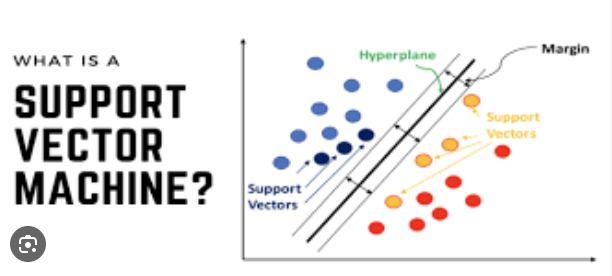

Support Vector Machine (SVM) is a supervised learning algorithm used for classification and regression tasks. SVMs are particularly effective in high-dimensional spaces and are capable of constructing a hyperplane or set of hyperplanes in a high-dimensional space, which can be used for classification, regression, or outlier detection.

Here's a brief overview of how SVM works for classification tasks:

Linear Separability: SVM aims to find the hyperplane that best separates the classes in the feature space. In a binary classification problem, this hyperplane is a line in two dimensions, a plane in three dimensions, and a hyperplane in higher dimensions. The goal is to find the hyperplane that maximizes the margin, i.e., the distance between the hyperplane and the nearest data points from each class, known as support vectors.

Kernel Trick: In cases where the classes are not linearly separable in the original feature space, SVMs can use a kernel function to map the input features into a higher-dimensional space where linear separation is possible. Common kernel functions include linear, polynomial, radial basis function (RBF), and sigmoid. The choice of kernel function and its parameters significantly impact the performance of the SVM.

Margin Maximization: SVM aims to find the hyperplane that maximizes the margin between the classes. This ensures better generalization to unseen data and improves the robustness of the classifier. Support vectors, which are the data points closest to the decision boundary, play a crucial role in determining the margin and defining the hyperplane.

Regularization Parameter: SVMs also incorporate a regularization parameter (C) that controls the trade-off between maximizing the margin and minimizing the classification error. A smaller value of C leads to a wider margin but may result in misclassification of some training examples, while a larger value of C allows for fewer misclassifications but may lead to overfitting.

Decision Function: Once the hyperplane is determined, SVM classifies new data points by computing their distance from the hyperplane. If the distance is positive, the data point belongs to one class; if it is negative, it belongs to the other class.

Overall, SVMs are versatile and powerful classifiers that can handle both linear and nonlinear classification tasks. They are widely used in various applications, including text classification, image recognition, bioinformatics, and finance. However, SVMs can be sensitive to the choice of kernel function and its parameters, and they may require careful tuning for optimal performance.

***Why Support vector machine***
Strengths: Effective in high-dimensional spaces, versatile with different kernel functions, robust to overfitting.
Weaknesses: Computationally intensive for large datasets, sensitive to choice of kernel parameters.

Accordingly the gamma is a parameter which ranges from 0 to 1.A higher value of gamma will perfectly fit the training detset which causes overfit Gamma=0.1 is considered to be a good default value. The value of gamma needs to be manually specified in the learning algorithm.

In [ ]:
# Step 1: Split data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels) #a variation of k-fold which returns stratified folds: each set contains approximately the same percentage of samples of each target class as the complete set
#Stratify is needed as the dataset is imbalanced to ensurethat the distribution of classes in the training and testing sets is similar to the distribution in the original dataset



In [ ]:
 #Step 2: Perform Grid Search for hyperparameters
 #: Perform a grid search over a range of hyperparameters for the RBF kernel, such as the regularization parameter
 # Like C and gamma kernel.Vary these parameters over a predefined range and use cross-validation to find the combination that yields the best performance.

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Best Parameters: {'C': 100, 'gamma': 0.001}


In [ ]:
# Step 3: Assess model performance using Cross-Validation


svm_model = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
cv_scores = cross_val_score(svm_model, x_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.375      1.         0.85714286 0.57142857 0.85714286]
Mean CV Score: 0.7321428571428572


According to these results the output tells us that:  
Here's what each value signifies:

The first fold achieved an accuracy of 37.5%.


The second fold achieved an accuracy of approximately 100%.

The third fold achieved an accuracy of approximately 85.7%.

The fourth fold achieved an accuracy of approximately 57.14%.

The fifth fold achieved an accuracy of approximately 85.71%.

The Mean CV Score, calculated as the average of these scores, is
0.73

which means the average accuracy across all folds is 73%.

These results provide insight into the stability and generalization performance of your model. In this case, the model seems to have varying performance across different folds, with the mean accuracy being 70%. Further analysis may be needed to understand why the performance varies and how it can be improved.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
# Step 4: Evaluate on the test set
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)

# Step 5: Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[5 0 1]
 [2 0 0]
 [0 0 2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.00      0.00      0.00         2
           2       0.67      1.00      0.80         2

    accuracy                           0.70        10
   macro avg       0.46      0.61      0.52        10
weighted avg       0.56      0.70      0.62        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The confusion matrix you provided can be interpreted as follows:

Actual class 0: There are 5 instances correctly classified as class 0 (true negatives), and 1 instance incorrectly classified as class 2 (false negative).
Actual class 1: There are 2 instances incorrectly classified as class 0 (false positive), and 0 instances correctly classified as class 1.
Actual class 2: There are 2 instances correctly classified as class 2 (true positives), and 0 instances incorrectly classified as class 0 or class 1.

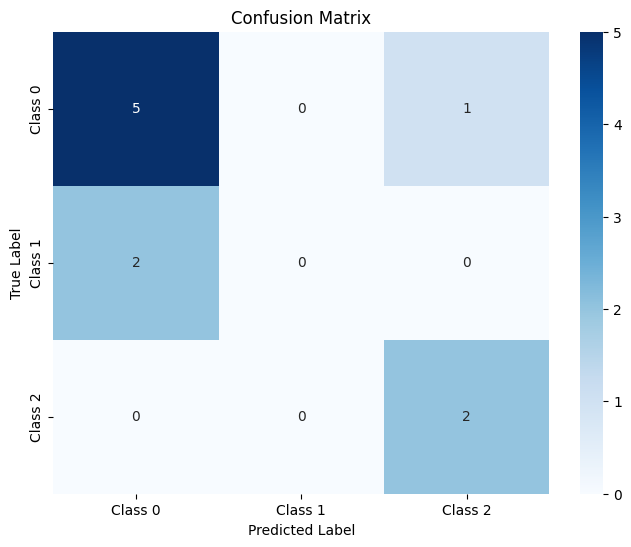

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix data
conf_matrix = np.array([[5, 0, 1],
                        [2, 0, 0],
                        [0, 0, 2]])


# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#Fine tuning our model
#In this code block there will be a trial for fine tuning our model as there is an imbalance working with dataets one approach is
# to oversample the minority class
#One technique to be used is Synthetic Minority over sampling technqiue
# Instantiate SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority',random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
y_train_resampled.shape

(53,)

In [ ]:
# Step 4: Evaluate on the test set
svm_model.fit(X_train_resampled, y_train_resampled)
y_pred = svm_model.predict(x_test)

# Step 5: Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[6 0 0]
 [2 0 0]
 [1 0 1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       0.00      0.00      0.00         2
           2       1.00      0.50      0.67         2

    accuracy                           0.70        10
   macro avg       0.56      0.50      0.49        10
weighted avg       0.60      0.70      0.61        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


After applying SMOTE there is an enhancment in class 2 after applying SMOTE as misclassification reduced from 2 to 1.Moreover from the classification report point of view Comparing the two reports:

Accuracy: The accuracy in the first report (0.70) is higher than in the second report (0.60). Higher accuracy generally indicates better overall performance, but accuracy alone may not be sufficient, especially in the presence of class imbalance.

Precision, Recall, F1-score: In the first report, Class 0 has higher precision, recall, and F1-score compared to the second report. Additionally, Class 2 has a higher precision and F1-score in the first report. However, Class 1 has a recall of 0 in both reports, indicating that it's not being predicted correctly.

Support: The number of instances (support) for each class is the same in both reports.

Considering these factors, the first classification report (Report 1) seems to be better overall, as it has higher accuracy and better precision, recall, and F1-scores for Classes 0 and 2. However, it's crucial to further investigate and potentially address the issues with Class 1, which has a recall of 0 in both reports.

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print('{}% of samples were correctly classified'.format(str(score * 100)))

70.0% of samples were correctly classified



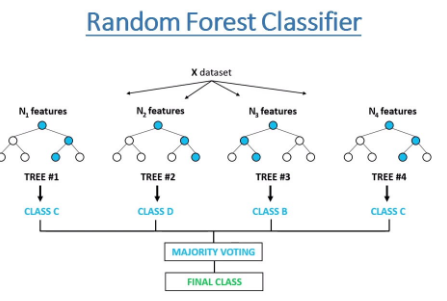

Random forrest
A random forest is a supervised machine learning algorithm that is constructed from decision tree algorithms. This algorithm is applied in various industries such as banking and e-commerce to predict behavior and outcomes. A random forest is a machine learning technique that’s used to solve regression and classification problems. It utilizes ensemble learning, which is a technique that combines many classifiers to provide solutions to complex problems.

A random forest algorithm consists of many decision trees. The ‘forest’ generated by the random forest algorithm is trained through bagging or bootstrap aggregating. Bagging is an ensemble meta-algorithm that improves the accuracy of machine learning algorithms.


# Training Random Forest


n_estimators: the number of decision trees in the forest. Increasing this hyperparameter generally improves the performance of the model but also increases the computational cost of training and predicting.

max_depth: the maximum depth of each decision tree in the forest. Setting a higher value for max_depth can lead to overfitting while setting it too low can lead to underfitting.

RandomSearch Cv is used to explore randomly sampling conditions in this stage

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
# First tune the hyperparameters of the random forest
rf_classifier = RandomForestClassifier(random_state=42)
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}
rand_search = RandomizedSearchCV(rf_classifier,
                                 param_distributions = param_dist,
                                 n_iter=100,
                                 cv=5)
rand_search.fit(X_train_resampled, y_train_resampled)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79b73276a3e0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79b7332bba30>})

In [ ]:
best_params = rand_search.best_params_
best_accuracy = rand_search.best_score_

# Print the best parameters and best accuracy
print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

Best Parameters: {'max_depth': 19, 'n_estimators': 237}
Best Accuracy: 0.9054545454545455


The model showed enhancements for depth 17 and n_estimators of 108 with accuracy almost 90.5%

#Data Augmentation for image


Data augmentation is a technique of artificially increasing the training set by creating modified copies of a dataset using existing data. It includes making minor changes to the dataset or using deep learning to generate new data points.  
Augmented data is driven from original data with some minor changes. In the case of image augmentation, we make geometric and color space transformations (flipping, resizing, cropping, brightness, contrast) to increase the size and diversity of the training set.

When Should You Use Data Augmentation?  

*To prevent models from overfitting.

*The initial training set is too small.

*To improve the model accuracy.

*To Reduce the operational cost of labeling and cleaning the raw dataset.
Limitations of Data Augmentation

*The biases in the original dataset persist in the augmented data.

*Quality assurance for data augmentation is expensive.


Research and development are required to build a system with advanced applications.
 For example, generating high-resolution images using GANs can be challenging.

Finding an effective data augmentation approach can be challenging.

#Image Augmentation

Geometric transformations: randomly flip, crop, rotate, stretch, and zoom images. You need to be careful about applying multiple transformations on the same images, as this can reduce model performance.

Color space transformations: randomly change RGB color channels, contrast, and brightness.

Kernel filters: randomly change the sharpness or blurring of the image.

Random erasing: delete some part of the initial image.

Mixing images: blending and mixing multiple images.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train_resampled contains your image data
# Reshape X_train_resampled if necessary (assuming it's a 4D array with shape (samples, height, width, channels))
# If not, adjust the shape accordingly.

# Choose a random subset of images for visualization
num_samples_to_visualize = 5
sample_indices = np.random.choice(len(X_train_resampled), num_samples_to_visualize, replace=False)

# Visualize the selected samples
#plt.figure(figsize=(10, 5))
#for i, idx in enumerate(sample_indices):
   # plt.subplot(1, num_samples_to_visualize, i + 1)
   # plt.imshow(X_train_resampled[idx])  # Assuming X_train_resampled contains image data
   # plt.title(f'Sample {idx}')
   # plt.axis('off')
#plt.show()

# Print the shapes of the selected samples
for idx in sample_indices:
    print(f'Sample {idx} shape: {X_train_resampled[idx].shape}')
import numpy as np

# Calculate the side length of the square image
total_elements = 35775    # Replace with the actual total number of elements in your flattened image
side_length = int(np.sqrt(total_elements))

# Display the calculated side length
print(f"Estimated side length of the square image: {side_length}")

# Determine the suitable height and width
height = 25
width = 27

# Display the determined height and width
print(f"Suitable height: {height}, width: {width}")
X_train_reshaped = X_train_resampled.reshape(X_train_resampled.shape[0], height, width, 1)



Sample 35 shape: (675,)
Sample 33 shape: (675,)
Sample 34 shape: (675,)
Sample 1 shape: (675,)
Sample 52 shape: (675,)
Estimated side length of the square image: 189
Suitable height: 25, width: 27


In [ ]:
# Define data augmentation parameters
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,      # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1, # randomly shift images vertically (fraction of total height)
    shear_range=0.2,        # shear intensity (shear angle in counter-clockwise direction in degrees)
    zoom_range=0.2,         # randomly zoom in/out on images
    horizontal_flip=True,   # randomly flip images horizontally
    fill_mode='nearest'     # fill mode for points outside the input boundaries
)

Our model will use Convolutional layer in Neural Network  particularly in convolutional neural networks (CNNs).First our Model used activation function relu to begin with where there is other activation function that would be fit in our model Leaky ReLU, Parametric ReLU (PReLU), and Exponential Linear Unit (ELU). Pooling layer downsampling feature maps, reducing spatial dimensions, and extracting dominant features. For our problems  the input feature maps will be downsampled by a factor of 2 along both the height and width dimensions. Each 2x2 region of the input feature map will be reduced to a single maximum value, resulting in a downscaled feature map.

In [ ]:
# Define CNN model architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(25, 27, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with data augmentation
datagen.fit(X_train_reshaped)


In [ ]:

model.fit(datagen.flow(X_train_reshaped, y_train_resampled, batch_size=32),
          steps_per_epoch=len(X_train_reshaped) / 32,
          epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 207ms/step - loss: 6.4017 - accuracy: 0.4717
Epoch 2/10
1/1 [==============================] - 1s 349ms/step - loss: 4.1932 - accuracy: 0.2642
Epoch 3/10
1/1 [==============================] - 1s 289ms/step - loss: 4.0037 - accuracy: 0.3396
Epoch 4/10
1/1 [==============================] - 0s 218ms/step - loss: 2.7736 - accuracy: 0.4340
Epoch 5/10
1/1 [==============================] - 1s 347ms/step - loss: 1.8744 - accuracy: 0.3774
Epoch 6/10
1/1 [==============================] - 0s 234ms/step - loss: 2.0350 - accuracy: 0.4151
Epoch 7/10
1/1 [==============================] - 0s 215ms/step - loss: 1.7517 - accuracy: 0.3585
Epoch 8/10
1/1 [==============================] - 0s 213ms/step - loss: 1.5114 - accuracy: 0.4151
Epoch 9/10
1/1 [==============================] - 0s 116ms/step - loss: 1.2293 - accuracy: 0.4151
Epoch 10/10
1/1 [==============================] - 0s 127ms/step - loss: 1.3971 - accuracy: 0.3396


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import RMSprop, SGD, Nadam

# Define a more aggressive learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch % 5 == 0 and epoch != 0:
        lr = lr * 0.5  # Reduce learning rate by half every 5 epochs
    return lr

# Create the model with increased capacity and more dropout layers
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(25, 27, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compile the model with Adam optimizer and sparse categorical crossentropy loss
#model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Compile the model with a different optimizer
model.compile(optimizer=RMSprop(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# OR
#model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# OR
#model.compile(optimizer=Nadam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Train the model with data augmentation
history = model.fit(datagen.flow(X_train_reshaped, y_train_resampled, batch_size=32),
                    steps_per_epoch=len(X_train_reshaped) / 32,
                    epochs=50,  # Increase number of epochs
                    callbacks=[LearningRateScheduler(lr_scheduler)])  # Apply learning rate scheduler



Epoch 1/50
1/1 [==============================] - 0s 205ms/step - loss: 8.3943 - accuracy: 0.3962 - lr: 0.0010
Epoch 2/50
1/1 [==============================] - 0s 177ms/step - loss: 10.1317 - accuracy: 0.4340 - lr: 0.0010
Epoch 3/50
1/1 [==============================] - 0s 190ms/step - loss: 1.0849 - accuracy: 0.3962 - lr: 0.0010
Epoch 4/50
1/1 [==============================] - 0s 209ms/step - loss: 1.0425 - accuracy: 0.3962 - lr: 0.0010
Epoch 5/50
1/1 [==============================] - 0s 172ms/step - loss: 1.2053 - accuracy: 0.3019 - lr: 0.0010
Epoch 6/50
1/1 [==============================] - 0s 221ms/step - loss: 1.0470 - accuracy: 0.3774 - lr: 5.0000e-04
Epoch 7/50
1/1 [==============================] - 0s 211ms/step - loss: 1.0020 - accuracy: 0.5660 - lr: 5.0000e-04
Epoch 8/50
1/1 [==============================] - 0s 202ms/step - loss: 1.0376 - accuracy: 0.3396 - lr: 5.0000e-04
Epoch 9/50
1/1 [==============================] - 0s 184ms/step - loss: 0.9852 - accuracy: 0.6226 -

In [ ]:
from tensorflow.keras.applications import VGG16
import cv2
X_train_resized = np.array([cv2.resize(img, (32, 32)) for img in X_train_reshaped])

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))  # Adjust input shape according to your data

# Freeze the weights of the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add your custom classifier layers on top
# Example:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_reshaped, y_train_resampled, validation_data=(x_test, y_test), epochs=10, batch_size=32)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


ValueError: Input 0 of layer "sequential_9" is incompatible with the layer: expected shape=(None, 32, 32, 3), found shape=(32, 25, 27, 1)